<h2>Задание</h2>

Провести EDA:

1)определение цели анализа (что хотим понять, на какие вопросы будем отвечать?), выдвинуть гипотезы

2)работа с пропусками

3)выявление зависимостей

4)создание новых переменных

5)сортировка, фильтрация, группировка

6)определение и работа с выбросами

7)проверка гипотез

8)визуализация

9)выводы 

Используемые статистические методы: критерий согласия хи-квадрат, критерий независимости хи-квадрат, t-тесты (одновыборочный, парный, двухвыборочный)

10)На 8+ можно взять один из этих методов: корреляционный анализ, регрессии, кластерный анализ, ANOVA

<h2>Используемые Библиотеки</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,chisquare

import pylab
import scipy
from scipy import stats
import statsmodels.api as sm

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


<h2>Первичный анализ данных</h2>

In [2]:
#Читаем Датасет и устанавливаем название курса в качестве индекса
df = pd.read_csv('Coursera.csv',index_col='course')

In [3]:
#Первые 5 строк датасета
df.head()

,partner,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
course,,,,,,,,
Google Cybersecurity,Google,"{"" Network Security"","" Python Programming"","" L...",4.8,16.4k,Beginner,Professional Certificate,3 - 6 Months,False
Google Data Analytics,Google,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133.4k,Beginner,Professional Certificate,3 - 6 Months,True
Google Project Management:,Google,"{"" Project Management"","" Strategy and Operatio...",4.8,97.3k,Beginner,Professional Certificate,3 - 6 Months,True
Google Digital Marketing & E-commerce,Google,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21.4k,Beginner,Professional Certificate,3 - 6 Months,False
Google IT Support,Google,"{"" Computer Networking"","" Network Architecture...",4.8,181.4k,Beginner,Professional Certificate,3 - 6 Months,True


In [4]:
#Последние 5 строк датасета
df.tail()

,partner,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
course,,,,,,,,
Post Graduate Certificate in Cloud Computing Applications,IIT Guwahati,NaN,NaN,NaN,NaN,University Certificate,6 - 12 Months,False
Business Essentials University Certificate,IE Business School,"{"" Strategy and Operations"","" Leadership and M...",NaN,NaN,NaN,University Certificate,6 - 12 Months,False
Post Graduate Certificate in Strategic Supply Chain Management with AI,IIT Roorkee,"{"" Machine Learning"","" Python Programming"","" R...",NaN,NaN,NaN,University Certificate,6 - 12 Months,False
Power Electronics and Motors for Electric Vehicles (EVs) Certificate,IIT Bombay,NaN,NaN,NaN,NaN,University Certificate,6 - 12 Months,False
Entrepreneurship and Strategic Innovation Graduate Certificate,University of Illinois,"{"" Accounting"","" Finance"","" General Statistics...",NaN,NaN,NaN,Graduate Certificate,6 - 12 Months,True


In [5]:
#Выводим базовую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, Google Cybersecurity to Entrepreneurship and Strategic Innovation Graduate Certificate
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner            1139 non-null   object 
 1   skills             1088 non-null   object 
 2   rating             993 non-null    float64
 3   reviewcount        993 non-null    object 
 4   level              1004 non-null   object 
 5   certificatetype    1116 non-null   object 
 6   duration           1116 non-null   object 
 7   crediteligibility  1139 non-null   bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 72.3+ KB


<h2>Цели анализа</h2>

1) Определить влияние признаков на рейтинг курса
2) Проверить гипотезы: 
    Количество отзывов не влияет на рейтинг

    Возможность получения кредитов за курс не влияет на количество отзывов

    Средний рейтинг курсов не отличается от общего среднего

    Распределение рейтингов в датасете является равномерным
    
    Рейтинг курса не влияет на число отзывов


<h2>Работа с пустыми значениями</h2>

In [6]:
#исходя из полученной в предыдущем пункте информации 
# часть пустых значений не являются пустыми, а заполнены string='None'
for column in df.columns:
    df[column] = df[column].replace('None',pd.NA)

In [7]:
#подсчитаем пустые значения
print(df.isnull().sum())

partner                0
skills                51
rating               146
reviewcount          146
level                135
certificatetype       23
duration              23
crediteligibility      0
dtype: int64


In [8]:
#Посклольку анализ подразумевает работу с рейтингом, и 
# восстановить значения рейтинга невозможно
# удалим строки с пустым рейтингом
df = df[~df['rating'].isna()]

In [9]:
#Проверим в каких колонках остались пустые значения
print(df.isnull().sum())

partner              0
skills               0
rating               0
reviewcount          0
level                0
certificatetype      0
duration             0
crediteligibility    0
dtype: int64


In [10]:
#Ура! Пустых значений в датасете больше не осталось

<h2>Создание новых переменных</h2>

In [11]:
#Исходя из предыдущих пунктов данные в датасете не размечены, 
#поэтому перед поиском зависимостей лучше 
#обработать переменные/создать новыые

In [12]:
#Трансформируем число отзывов в число
df['reviewcount'] = df['reviewcount'].apply(lambda x: int(float(x[:-1]) * 1000) if 'k' in x else int(x))

#Считаем число компетенций для каждого курса
df['skills_count'] = df['skills'].apply(lambda x: len(eval(x)))

In [13]:
#Создаем числовые категории на основе строчных
def get_lvl_cat(x):
    x = x.strip()
    if x == 'Beginner':
        return 0
    elif x == 'Intermediate':
        return 1
    elif x == 'Mixed':
        return 2
    elif x == 'Advanced':
        return 3
    else:
        return '99999'
    
def get_len_cat(x):
    x = x.strip()
    if x == '3 - 6 Months':
        return 2
    elif x == '1 - 3 Months':
        return 3
    elif x == '1 - 4 Weeks':
        return 1
    elif x == 'Less Than 2 Hours':
        return 0
    else:
        return '99999'
    
def get_cred_cat(x):
    if x ==  True:
        return 1
    elif x == False:
        return 0
    else:
        return '99999' 

def get_sert_cat(x):
    x = x.strip()
    if x == 'Course':
        return 1
    elif x == 'Specialization':
        return 2
    elif x == 'Professional Certificate':
        return 0
    elif x == 'Guided Project':
        return 3
    else:
        return '99999'
    
df['len_cat'] = df['duration'].apply(get_len_cat)
df['sert_cat'] = df['certificatetype'].apply(get_sert_cat)
df['cred_cat'] = df['crediteligibility'].apply(get_cred_cat)
df['lvl_cat'] = df['level'].apply(get_lvl_cat)


In [14]:
#Добавим новую переменную: Отношение рейтинга к числу компетенций
df['average_rating_per_skill'] = df['rating'] / df['skills_count']

In [15]:
#Добавим новую переменную: Отношение  числа окомпетенций  к числу отзывов
df['average_skils_per_review'] = df['skills_count'] / df['reviewcount']

In [16]:
df

,partner,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility,skills_count,len_cat,sert_cat,cred_cat,lvl_cat,average_rating_per_skill,average_skils_per_review
course,,,,,,,,,,,,,,,
Google Cybersecurity,Google,"{"" Network Security"","" Python Programming"","" L...",4.8,16400,Beginner,Professional Certificate,3 - 6 Months,False,14,2,0,0,0,0.342857,0.000854
Google Data Analytics,Google,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133400,Beginner,Professional Certificate,3 - 6 Months,True,25,2,0,1,0,0.192000,0.000187
Google Project Management:,Google,"{"" Project Management"","" Strategy and Operatio...",4.8,97300,Beginner,Professional Certificate,3 - 6 Months,True,24,2,0,1,0,0.200000,0.000247
Google Digital Marketing & E-commerce,Google,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21400,Beginner,Professional Certificate,3 - 6 Months,False,19,2,0,0,0,0.252632,0.000888
Google IT Support,Google,"{"" Computer Networking"","" Network Architecture...",4.8,181400,Beginner,Professional Certificate,3 - 6 Months,True,19,2,0,1,0,0.252632,0.000105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interviewing and Resume Writing in English,"University of Maryland, College Park","{"" Communication"","" Human Resources"","" Strateg...",4.6,710,Intermediate,Specialization,3 - 6 Months,False,11,2,2,0,1,0.418182,0.015493
Strategic Sales Management,Fundação Instituto de Administração,"{"" Sales"","" Marketing"","" Strategy"","" Leadershi...",4.5,427,Intermediate,Specialization,3 - 6 Months,False,13,2,2,0,1,0.346154,0.030445
Essentials of Corporate Finance,The University of Melbourne,"{"" Finance"","" Investment Management"","" Financi...",4.6,1800,Intermediate,Specialization,3 - 6 Months,False,21,2,2,0,1,0.219048,0.011667


<h2>Поиск Зависимостей</h2>

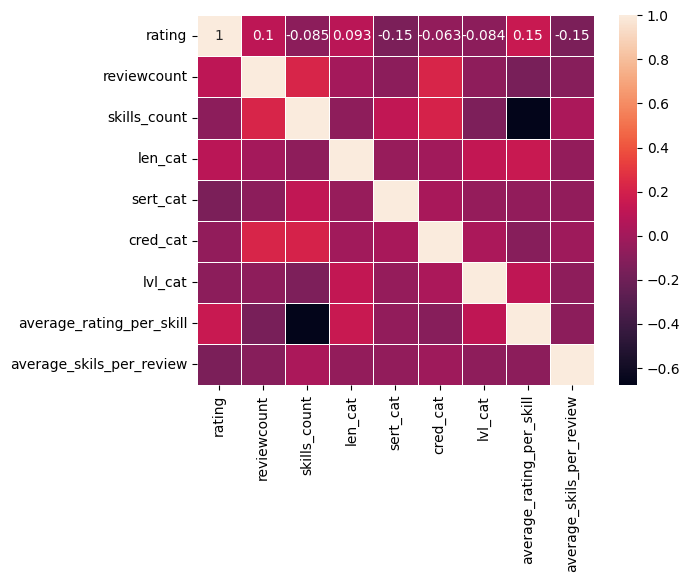

<Figure size 200x100 with 0 Axes>

In [17]:
#Построим матрицу кореляций, чтобы выяснить корреляции между колонками
corr_matrix = df[['rating','reviewcount','skills_count','len_cat','sert_cat','cred_cat','lvl_cat','average_rating_per_skill','average_skils_per_review']].corr()
sns.heatmap(corr_matrix,annot=True,linewidth=.5)
plt.figure(figsize=(2,1))
plt.show()

Явной кореляции рейтинга и признаков не выявлено, существует незначительная положительная кореляция рейтинга и числа отзывов, и незначительная отрицательная корреляция рейтинга и категории курса

<h2>Сортировка, Фильтрация, Группировка</h2>

In [18]:
#Отсортируем датасет по рейтингу
df = df.sort_values(by='rating', ascending=False)

#Отфильтруем дублирующиеся колонки
df_filtered = df[['rating', 'reviewcount', 'skills_count', 'sert_cat', 'average_rating_per_skill','average_skils_per_review','cred_cat']]

#Найдем среднее для уровня курса, партнера и длительности
mean_rating_by_level = df.groupby('level')['rating'].mean()
mean_rating_by_part = df.groupby('partner')['rating'].mean()
mean_rating_by_dur = df.groupby('duration')['rating'].mean()

In [19]:
print(mean_rating_by_level)

level
Advanced         4.577143
Beginner         4.692262
Intermediate     4.621212
Mixed            4.728409
Name: rating, dtype: float64


In [20]:
print(mean_rating_by_part)

partner
Advancing Women in Tech                     4.600000
Akamai Technologies, Inc.                   4.900000
Amazon Web Services                         4.800000
American Museum of Natural History          4.700000
Aptly                                       4.700000
                                              ...   
Yale University                             4.841176
Yonsei University                           4.800000
École Polytechnique                         4.800000
École Polytechnique Fédérale de Lausanne    4.700000
École des Ponts ParisTech                   4.800000
Name: rating, Length: 158, dtype: float64


In [21]:
print(mean_rating_by_dur)

duration
 1 - 3 Months         4.705758
 1 - 4 Weeks          4.681463
 3 - 6 Months         4.659465
 Less Than 2 Hours    4.422222
Name: rating, dtype: float64


<h2>Работа с Выбросами</h2>

In [22]:
#найдем колонки наиболее склонные к выбросам
df.describe()

,rating,reviewcount,skills_count,len_cat,sert_cat,cred_cat,lvl_cat,average_rating_per_skill,average_skils_per_review
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,4.677241,7827.922457,10.584089,2.107754,1.310171,0.045317,0.482377,1.416316,0.019592
std,0.190091,19899.483607,9.188836,0.750987,0.658740,0.208104,0.799409,1.658379,0.068463
min,2.800000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.095745,0.000027
25%,4.600000,470.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.288235,0.001028
50%,4.700000,1900.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.490000,0.004000
75%,4.800000,5600.000000,16.000000,3.000000,2.000000,0.000000,1.000000,1.633333,0.014134
max,5.000000,268600.000000,47.000000,3.000000,3.000000,1.000000,3.000000,5.000000,1.250000


In [23]:
#Наиболее склонны к выбросам колонки  reviewcount, rating и skills_count, решим проблему с выбросами 3 способами

<function matplotlib.pyplot.show(close=None, block=None)>

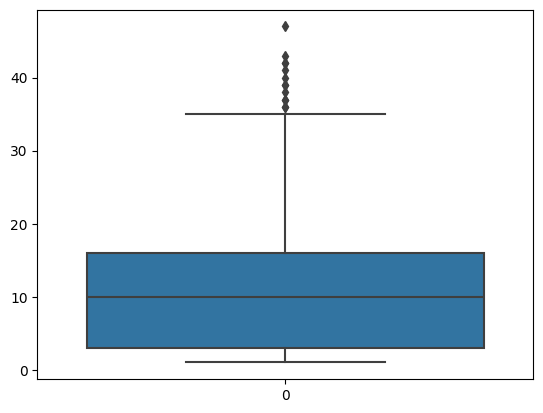

In [24]:
#визуализируем выбросы для колонки skills_count
sns.boxplot(data = df['skills_count'])
plt.show

In [25]:
zscore = scipy.stats.zscore(df['skills_count'])
df_trimmed = df[~(zscore.abs() > 2)]

<function matplotlib.pyplot.show(close=None, block=None)>

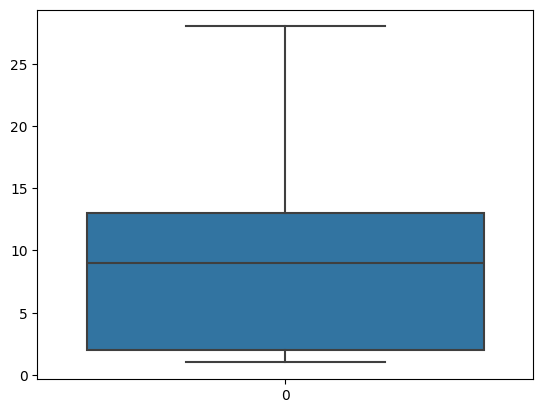

In [26]:
#Проверяем успешность очистки
sns.boxplot(data = df_trimmed['skills_count'])
plt.show

In [27]:
#Ура! Выбросов не обнаружено!

<function matplotlib.pyplot.show(close=None, block=None)>

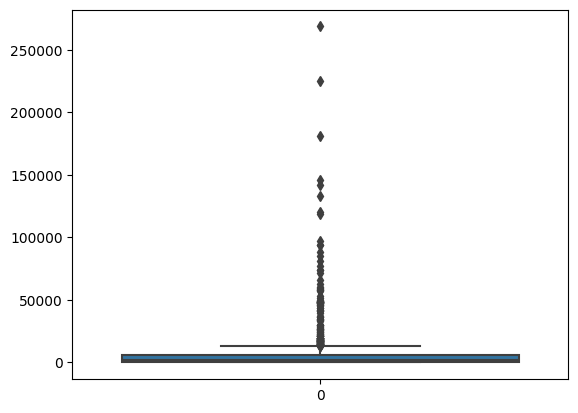

In [28]:
#визуализируем выбросы для колонки reviewcount
sns.boxplot(data = df['reviewcount'])
plt.show

In [29]:
#Определяем 1 и 3 перцентили для колонки reviewcount
q3 = np.percentile(df['reviewcount'], 75)
q1 = np.percentile(df['reviewcount'], 25)

print(q1, q3)

470.0 5600.0


In [30]:
#Обрезаем датафрейм по границам
df_trimmed2 = df[(df['reviewcount'] < q3) & (df['reviewcount'] > q1)]

<function matplotlib.pyplot.show(close=None, block=None)>

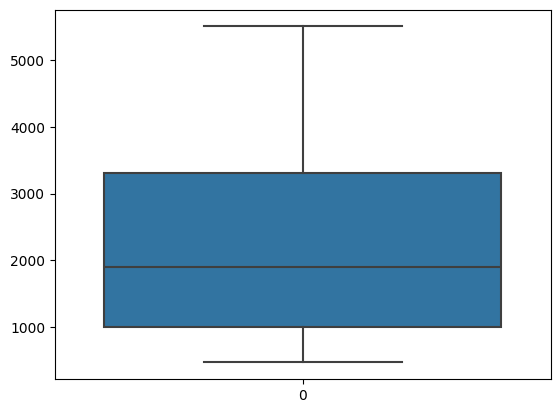

In [31]:
#визуализируем выбросы для колонки reviewcount
sns.boxplot(data = df_trimmed2['reviewcount'])
plt.show

Ура! Выбросов не обнаружено!

<function matplotlib.pyplot.show(close=None, block=None)>

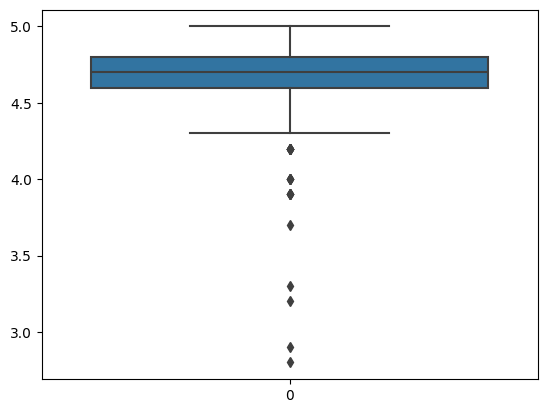

In [32]:
#визуализируем выбросы для колонки rating
sns.boxplot(data = df['rating'])
plt.show

In [33]:
#усечем выбросы методом Винзора
df_trimmed3 = df.copy()
df_trimmed3['rating'] = stats.mstats.winsorize(df_trimmed3['rating'], limits=[0.05, 0.05])


<function matplotlib.pyplot.show(close=None, block=None)>

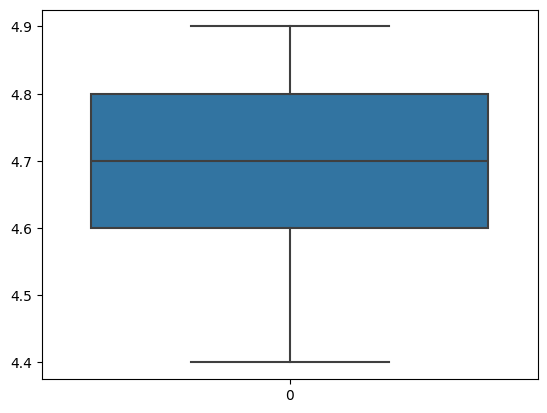

In [34]:
sns.boxplot(data = df_trimmed3['rating'])
plt.show

Ура! Выбросов не обнаружено!

In [35]:
#создадим новый датасет без выбросов на основе трех предыдущих методов
df_trimmed_final = df[~(zscore.abs() > 2)]
df_trimmed_final = df_trimmed_final[(df_trimmed_final['reviewcount'] < q3) & (df_trimmed_final['reviewcount'] > q1)]
df_trimmed_final['rating'] = stats.mstats.winsorize(df_trimmed_final['rating'], limits=[0.05, 0.05])


<h2>Проверка Гипотез</h2>

In [36]:
def check_hypothesis(pval,alpha):
    if pval > alpha:
        print('H0 не отвергаем')
    else:
        print('H0 можно отвергнуть')

alpha = 0.05

In [37]:
#Распределение рейтингов в датасете является равномерным

#Реальное распределение значений
observed_frequencies = df_trimmed_final['rating'].value_counts()
#Ожиданемое распределение значений
expected_frequencies = [len(df_trimmed_final) / len(observed_frequencies)] * len(observed_frequencies)

#критерий согласия хи-квадрат
chi2_stat, p_value = chisquare(observed_frequencies, expected_frequencies)

#выведем p-value и проверим гипотезу
print(p_value)
check_hypothesis(p_value,alpha)

4.768551010040838e-44
H0 можно отвергнуть


In [51]:
#Количество отзывов не влияет на рейтинг

#Сгруппируем отзывы по группам на основе числа значений
df_trimmed_final['review_bins'] = pd.cut(df_trimmed_final['reviewcount'], bins=[0, 470, 1900,5600, np.inf], labels=['Low', 'Medium', 'High','Very High'])
#Сгруппируем отзывы по группам на основе числа значений
contingency_table = pd.crosstab(df_trimmed_final['review_bins'], df_trimmed_final['rating'])

#критерий независимости хи-квадрат
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

#выведем p-value и проверим гипотезу
print(p_value)
check_hypothesis(p_value,alpha)

0.00261036019898769
H0 можно отвергнуть


In [39]:
#Средний рейтинг курсов не отличается от общего среднего

#Выделим рейтинг в отдельную переменную
course_ratings = df_trimmed_final['rating']

#Одновыборочный t-тест
t_stat, p_value = stats.ttest_1samp(course_ratings, popmean=df['rating'].mean()) 

#выведем p-value и проверим гипотезу 
print(p_value)
check_hypothesis(p_value,alpha)

2.2764896994918095e-05
H0 можно отвергнуть


In [40]:
#Рейтинг курса не влияет на число отзывов
#Выделим число отзывов в две группы по числу рейтинга
low_rating = df_trimmed_final['reviewcount'][df_trimmed_final['rating']<4.6] 
high_rating = df_trimmed_final['reviewcount'][df_trimmed_final['rating']>4.6]

#Тк выборки не равные выберем случайные значения выоского рейтинга по длине низкого 
random_high_rating = high_rating.sample(n=len(low_rating), replace=True)

#Парный t-тест
t_stat, p_value = stats.ttest_rel(low_rating, random_high_rating)

#выведем p-value и проверим гипотезу
print(p_value)
check_hypothesis(p_value,alpha)

0.00894796605322837
H0 можно отвергнуть


In [41]:
#Возможность получения кредитов за курс не влияет на количество отзывов 

#Выберем число отзывов на основе кредабилити
credit_yes_reviews = df_trimmed_final[df_trimmed_final['crediteligibility']]['reviewcount']
credit_no_reviews = df_trimmed_final[~df_trimmed_final['crediteligibility']]['reviewcount']

#двухвыборочный t-тест
t_stat, p_value = ttest_ind(credit_yes_reviews, credit_no_reviews)

#выведем p-value и проверим гипотезу
print(p_value)
check_hypothesis(p_value,alpha)

0.3060391927133375
H0 не отвергаем


<h2>Визуализация</h2>

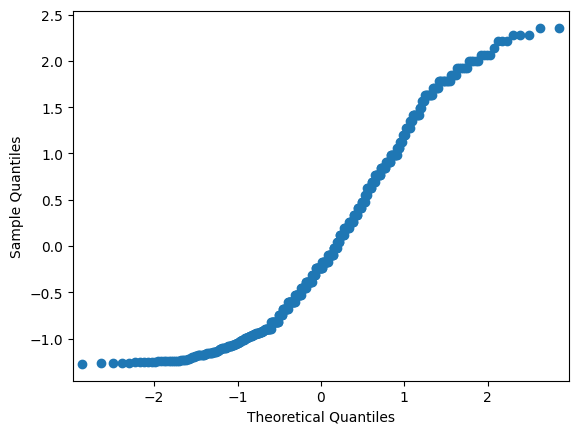

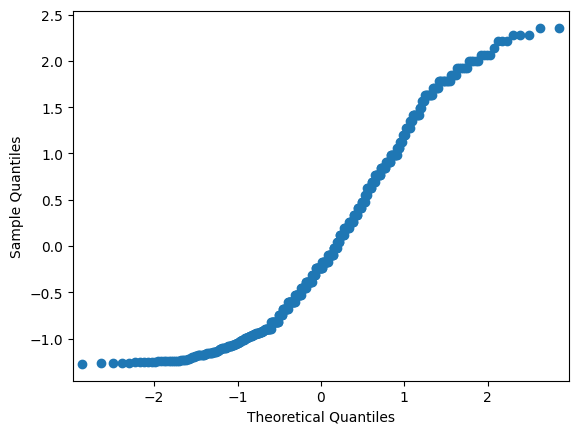

In [56]:
#График QQ 
sm.qqplot(df_trimmed_final.reviewcount, fit = True)

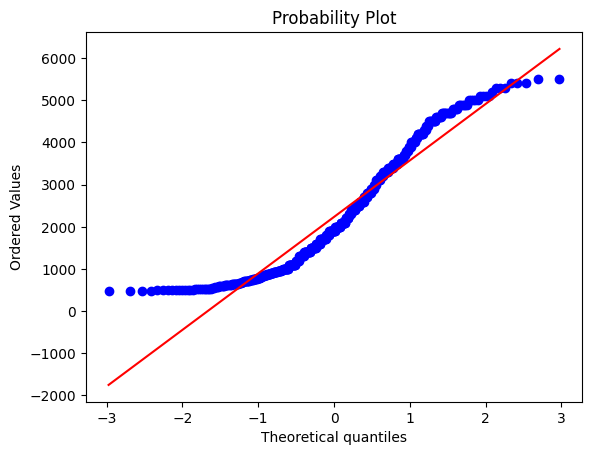

In [54]:
#График вероятностей
stats.probplot(df_trimmed_final.reviewcount, dist ='norm',plot = pylab)
pylab.show()

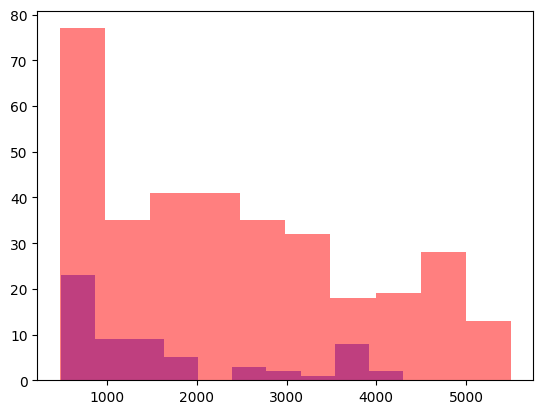

In [63]:
#График числа записей для категорий низкого и высокого рейтинга
plt.hist(df_trimmed_final['reviewcount'][df_trimmed_final['rating']<4.6], alpha = 0.5,color = 'blue')
plt.hist(df_trimmed_final['reviewcount'][df_trimmed_final['rating']>4.6], alpha = 0.5,color = 'red')
plt.show()

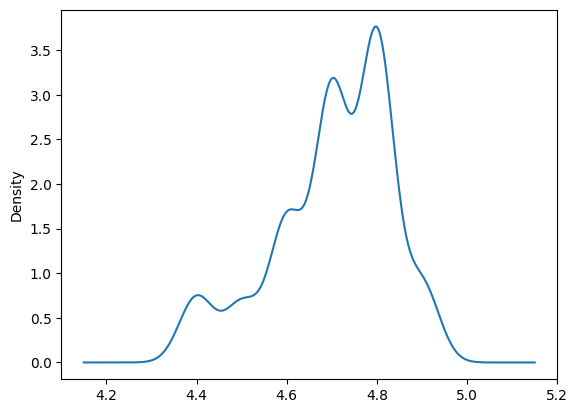

In [45]:
#Распределение рейтинга
df_trimmed_final['rating'].plot(kind = 'density')
plt.show()

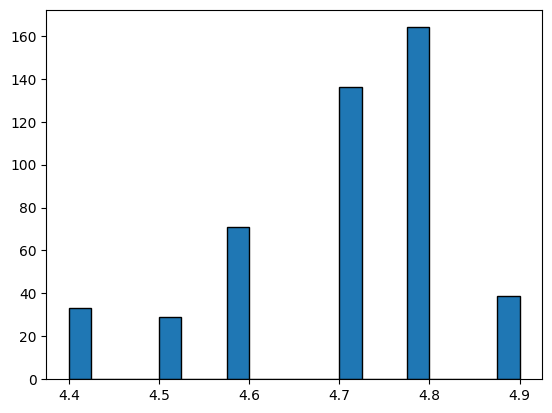

In [46]:
#гистограмма распределения рейтинга
plt.hist(df_trimmed_final['rating'], bins = 20 , edgecolor = 'black')
plt.show()

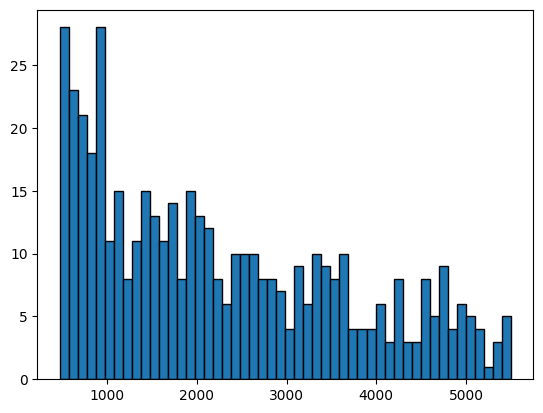

In [47]:
#гистограмма распределения числа отзывов
plt.hist(df_trimmed_final['reviewcount'], bins = 50 , edgecolor = 'black')
plt.show()

<h2>Кластеризация</h2>

In [48]:
#импортируем кластеры
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

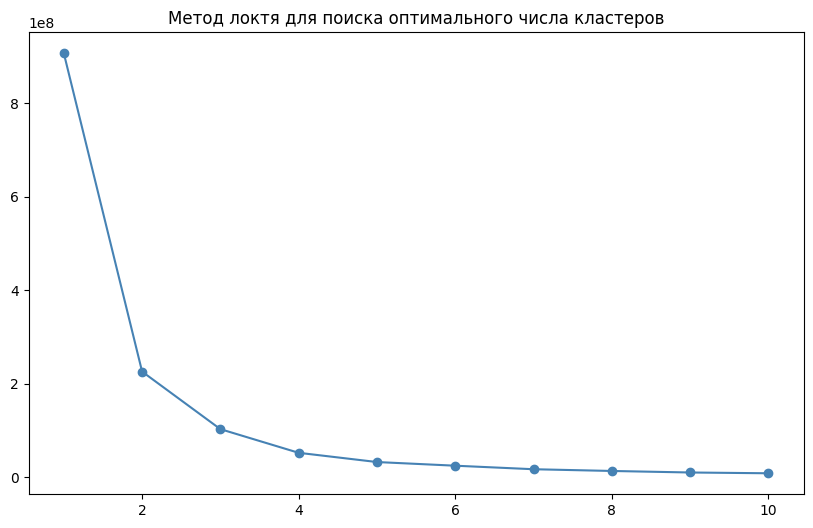

In [49]:
#Обработаем категориальные переменныее
cat_col = ['level','duration','crediteligibility','certificatetype']
label_encoder = LabelEncoder()
for x in cat_col:
  df_trimmed_final[x] = label_encoder.fit_transform(np.array(df_trimmed_final[x]).reshape(-1, 1))
  
#Создадим датасет для кластеризации
features_list = ['level','duration','crediteligibility','rating','reviewcount','average_rating_per_skill','average_skils_per_review','certificatetype']
X = df_trimmed_final[features_list]

#С помощью метода локтя определим оптимальное число кластеров
inertia = []
possible_cluster_counts = range(1,11)  

for k in possible_cluster_counts:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(possible_cluster_counts, inertia, marker='o', color='steelblue')
plt.title('Метод локтя для поиска оптимального числа кластеров')
plt.show()

In [50]:
#Оптимальное число кластеров - 3, 
#распределим значения по кластерам и проанализируем их
kmeans = KMeans(n_clusters=3, random_state=42)
X['cluster'] = kmeans.fit_predict(X)

#Сгрупируем значения по кластерам и посмотрим среднее значение для каждого класера
cluster_summary = X.groupby('cluster').mean()
cluster_summary[features_list]

,level,duration,crediteligibility,rating,reviewcount,average_rating_per_skill,average_skils_per_review,certificatetype
cluster,,,,,,,,
0,1.352941,1.065359,0.019608,4.726144,2621.568627,1.556572,0.003676,1.320261
1,1.366071,0.946429,0.035714,4.680804,1037.566964,1.431821,0.010114,1.169643
2,1.600000,1.157895,0.021053,4.717895,4433.684211,1.251151,0.002464,1.357895
